In [2]:
import pandas as pd

df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
import numpy as np

features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
- Impute Median value for Age column
- Impute Mode for Type of Contract
- Impute Median for Duration of Pitch
- Impute Mode for NumberofFollowup as it is Discrete feature
- Impute Mode for PreferredPropertyStar
- Impute Median for NumberofTrips
- Impute Mode for NumberOfChildrenVisiting
- Impute Median for MonthlyIncome

In [14]:
df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace= True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

/var/folders/jt/ptf8k2sx3758d5lvln35txsh0000gn/T/ipykernel_89793/2950420725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
/var/folders/jt/ptf8k2sx3758d5lvln35txsh0000gn/T/ipykernel_89793/2950420725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
df.drop('CustomerID', inplace= True, axis=1)

In [18]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Feature Engineering

In [19]:
df['TotalVisiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [20]:
df.shape

(4888, 18)

In [21]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features: ', len(num_features))
print(num_features)

Number of Numerical Features:  12
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [22]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features: ', len(cat_features))
print(cat_features)

Number of Categorical Features:  6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [23]:
discrete_feature = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_feature))
print(discrete_feature)

Number of discrete features:  9
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [24]:
continuous_features = [feature for feature in num_features if len(df[feature].unique()) > 25]
print('Number of continuous feature: ', len(continuous_features))
print(continuous_features)

Number of continuous feature:  3
['Age', 'DurationOfPitch', 'MonthlyIncome']


In [25]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


### Train/Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [28]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [29]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [34]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('cat_encoding', oh_transformer, cat_features),
        ('num_scaling', numeric_transformer, num_features)
    ]
)

In [35]:
preprocessor

ColumnTransformer(transformers=[('cat_encoding', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('num_scaling', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [36]:
X_train = preprocessor.fit_transform(X_train)

In [43]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [44]:
X_test = preprocessor.transform(X_test)

In [46]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382


### Random Forest Classifier Training

In [47]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [55]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training Set")
    print(f"-Accuracy: {model_train_accuracy:.4f}")
    print(f"-F1 Score: {model_train_f1:.4f}")
    print(f"-Precision: {model_train_precision:.4f}")
    print(f"-Recall: {model_train_recall:.4f}")
    print(f"-Roc Auc Score: {model_train_rocauc_score:.4f}")

    print('----------------------------------------------')

    print("Model performance for Test Set")
    print(f"-Accuracy: {model_test_accuracy:.4f}")
    print(f"-F1 Score: {model_test_f1:.4f}")
    print(f"-Precision: {model_test_precision:.4f}")
    print(f"-Recall: {model_test_recall:.4f}")
    print(f"-Roc Auc Score: {model_test_rocauc_score:.4f}")

    print('*'*50)
    print('\n')



Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000
----------------------------------------------
Model performance for Test Set
-Accuracy: 0.9315
-F1 Score: 0.9263
-Precision: 0.9769
-Recall: 0.6649
-Roc Auc Score: 0.8306
**************************************************


Logistic Regression
Model performance for Training Set
-Accuracy: 0.8460
-F1 Score: 0.8202
-Precision: 0.7016
-Recall: 0.3032
-Roc Auc Score: 0.6368
----------------------------------------------
Model performance for Test Set
-Accuracy: 0.8364
-F1 Score: 0.8087
-Precision: 0.6914
-Recall: 0.2932
-Roc Auc Score: 0.6307
**************************************************


Decision Tree
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000
----------------------------------------------
Model performance for Test Set
-Accuracy: 0.9192
-F1 Score: 0.9185
-

In [57]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [58]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [59]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params)
]

In [60]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator= model,
                                param_distributions=params,
                                n_iter = 100,cv=3,verbose=2,n_jobs=1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"Best Parameters for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=a

/Users/istiak/Documents/GitHub/holiday-package-prediction/env-rf/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/istiak/Documents/GitHub/holiday-package-prediction/env-rf/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/istiak/Documents/GitHub/holiday-package-prediction/env-rf/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/istiak/Documents/

Best Parameters for RF
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [62]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators= 200,
                                            min_samples_split= 2, 
                                            max_features= 8, 
                                            max_depth= None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training Set")
    print(f"-Accuracy: {model_train_accuracy:.4f}")
    print(f"-F1 Score: {model_train_f1:.4f}")
    print(f"-Precision: {model_train_precision:.4f}")
    print(f"-Recall: {model_train_recall:.4f}")
    print(f"-Roc Auc Score: {model_train_rocauc_score:.4f}")

    print('----------------------------------------------')

    print("Model performance for Test Set")
    print(f"-Accuracy: {model_test_accuracy:.4f}")
    print(f"-F1 Score: {model_test_f1:.4f}")
    print(f"-Precision: {model_test_precision:.4f}")
    print(f"-Recall: {model_test_recall:.4f}")
    print(f"-Roc Auc Score: {model_test_rocauc_score:.4f}")

    print('*'*50)
    print('\n')



Random Forest
Model performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc Score: 1.0000
----------------------------------------------
Model performance for Test Set
-Accuracy: 0.9356
-F1 Score: 0.9314
-Precision: 0.9638
-Recall: 0.6963
-Roc Auc Score: 0.8450
**************************************************




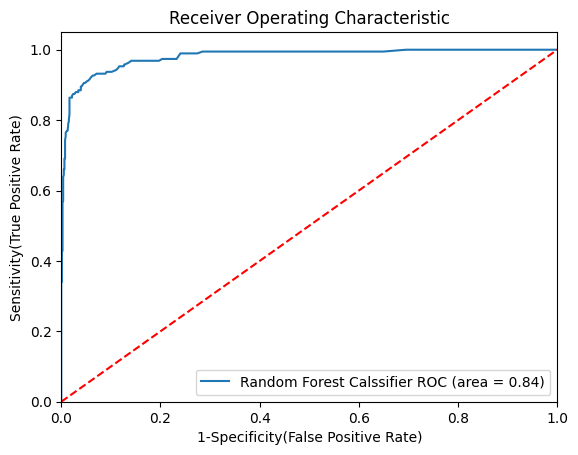

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

plt.figure()

auc_models = [
    {
        'label': 'Random Forest Calssifier',
        'model': RandomForestClassifier(n_estimators= 200,
                                            min_samples_split= 2, 
                                            max_features= 8, 
                                            max_depth= None),
        'auc': 0.8450
    }
]

for item in auc_models:
    mod = item['model']
    mod.fit(X_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, mod.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (item['label'], item['auc']))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 